### iris classification

In [1]:
from sklearn.datasets import load_iris                #iris data
from sklearn.ensemble import RandomForestClassifier   #Random forest classifier
import pandas as pd
import numpy as np

# random seed
np.random.seed(0)

In [2]:
# an object named iris with the data
iris = load_iris()

# put the data into pd dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()   # top 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#add species name
df['species'] = pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Creating TEST and TRAIN dataset
df['is_train'] = np.random.uniform(0,1,len(df)) <= .75
  # randomly selecting 75% data to train, 25% to test

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [6]:
# creating dataframes with test rows and training rows
train, test = df[df['is_train']==True], df[df['is_train']==False]
# print train and test data length
print('How many train data:', len(train))
print('How many test data:', len(test))

How many train data: 118
How many test data: 32


In [7]:
# Creating a list of the feature column's names
features = df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
# convert species into digits
y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Now the exciting Random Forest classifier!

In [9]:
# Create Random Forest Classifier
rfc = RandomForestClassifier(n_jobs=2,random_state=0)  # set parameters to define/limit the process
# Train it
rfc.fit(train[features],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
# Test our trained classifier
# using test fetures & trined classifier to predict 
rfc.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [11]:
# Now let's understand our prediction
# view the predicted probabilities of the first 10 
rfc.predict_proba(test[features])[10:20]

array([[1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.67, 0.33],
       [0.  , 1.  , 0.  ],
       [0.  , 0.82, 0.18],
       [0.  , 0.03, 0.97],
       [0.  , 0.42, 0.58],
       [0.  , 0.99, 0.01],
       [0.  , 0.96, 0.04]])

In [12]:
# mapping the number to the species name
preds = iris.target_names[rfc.predict(test[features])]
preds

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype='<U10')

In [13]:
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [14]:
# see how prediction compare with actual data
pd.crosstab(test['species'],preds,rownames=['Actua species'],colnames=['Predicted species'])

Predicted species,setosa,versicolor,virginica
Actua species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [15]:
# What's the accuracy?
count = np.where(test['species']==preds, 1, 0)
score = np.sum(count,axis=0)/len(test)
score

0.9375

In [16]:
# deploy the trained model, predict using new data
preds_new = iris.target_names[rfc.predict([[5.0,3.6,1.4,2.0],[1.8,1.2,4.5,3.1],[1.8,2.2,4.5,1.1]])]
preds_new

array(['setosa', 'virginica', 'versicolor'], dtype='<U10')

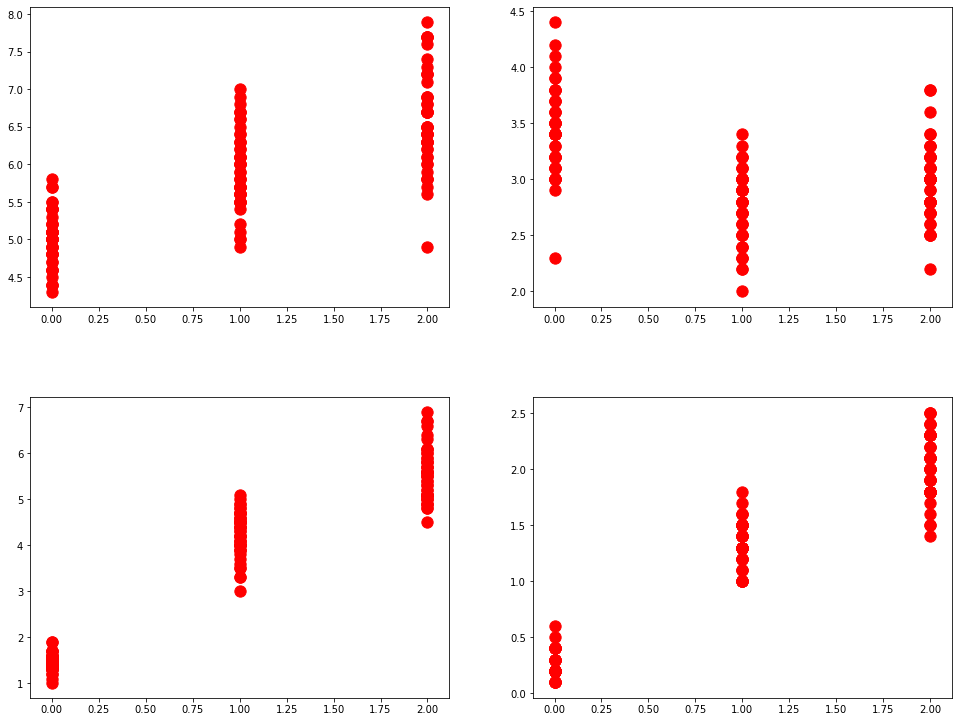

In [18]:
# plot the clustering
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(16,12))
i=0
for ax in axes.flat:
    b = df.T.iloc[i].values.reshape(-1,1)
#    b = df.T.iloc[4].values.reshape(-1,1)
    a = iris.target
    ax.scatter(a, b, s=128, c='r')
    i = i+1
fig.subplots_adjust(bottom=0.1, top=0.9, left=0, right=0.8,
                wspace=0.2, hspace=0.3)
#plt.savefig('MeanF_EPI.png',bbox_inches = 'tight')
plt.show()